In [ ]:
pip install rake-nltk

In [ ]:
#import library
from rake_nltk import Rake

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
#sample
doc = """   Natural language processing is a fascinating domain of artificial intelligence."    It allows computers to understand and generate human language.   """

In [ ]:
#create rake object and use it
#to extract keyphrases from text
r = Rake(include_repeated_phrases=False)
r.extract_keywords_from_text (doc)
keywords = r.get_ranked_phrases_with_scores()
#display result
print(keywords)

[(9.0, 'natural language processing'), (9.0, 'generate human language'), (9.0, 'artificial intelligence ."'), (4.0, 'fascinating domain'), (4.0, 'allows computers'), (1.0, 'understand')]


In [ ]:
pip install yake

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 2.4 MB/s eta 0:00:00


In [ ]:
import yake

In [ ]:
#create yake and use it to extract
#keywords or phrase
kw_extractor = yake.KeywordExtractor()
keywords = kw_extractor.extract_keywords(doc)
#display result
for kw in keywords:
  print(kw)

('Natural language processing', np.float64(0.019011452603399946))
('artificial intelligence', np.float64(0.035823369414816786))
('fascinating domain', np.float64(0.058386506213951056))
('domain of artificial', np.float64(0.058386506213951056))
('Natural language', np.float64(0.07143683563426448))
('language processing', np.float64(0.11900804226284042))
('Natural', np.float64(0.14724705908851674))
('intelligence', np.float64(0.14724705908851674))
('language', np.float64(0.22640134908386225))
('processing', np.float64(0.2348735419198309))
('fascinating', np.float64(0.2348735419198309))
('domain', np.float64(0.2348735419198309))
('artificial', np.float64(0.2348735419198309))
('generate human language', np.float64(0.23753221335476457))
('human language', np.float64(0.3048845311104686))
('computers to understand', np.float64(0.3628836306470974))
('understand and generate', np.float64(0.3628836306470974))
('generate human', np.float64(0.3628836306470974))
('computers', np.float64(0.516005465

In [ ]:
pip install spacy

In [ ]:
pip install keyword-spacy

  Preparing metadata (setup.py) ... done
  Created wheel for keyword-spacy: filename=keyword_spacy-0.1.2-py3-none-any.whl size=4069 sha256=cb1885f8dc049dcd0c00865c4f6103318694305274646dd34c1f1f75bd4f05e9
  Stored in directory: /root/.cache/pip/wheels/25/3e/94/5682fefa6e261ec2c6585c29b03e1eab2fc016a897a164f05e
Successfully built keyword-spacy


In [ ]:
import spacy
from keyword_spacy import KeywordExtractor

In [ ]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 40.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
#load and create spacy model
nlp = spacy.load("en_core_web_md")
nlp.add_pipe("keyword_extractor", last=True, config={"top_n": 10, "min_ngram": 3,"max_ngram": 3,"strict": True,"top_n_sent": 3} )

In [ ]:
doc = nlp(doc)
print("Top Document Keywords:", doc._.keywords)
for sent in doc.sents:
    print(f"Sentence: {sent.text}")
    print("Top Sentence Keywords:", sent._.sent_keywords)

Top Document Keywords: [('Natural language processing', 1, np.float32(0.7833463)), ('generate human language', 1, np.float32(0.8028751))]
Sentence:    Natural language processing is a fascinating domain of artificial intelligence."    
Top Sentence Keywords: [('Natural language processing', np.float32(0.7833463))]
Sentence: It allows computers to understand and generate human language.   
Top Sentence Keywords: [('generate human language', np.float32(0.8028751))]


In [ ]:
pip install wordcloud

In [ ]:
pip install matplotlib

In [ ]:
import collections
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from wordcloud import WordCloud, STOPWORDS

In [ ]:
doc = """   Natural language processing is a fascinating domain of artificial intelligence."   It allows computers to understand and generate human language .   """

In [ ]:
#create word cloud model
stopwords = STOPWORDS
wordcloud = WordCloud(stopwords=stopwords,background_color="white",max_words=1000).generate(doc)

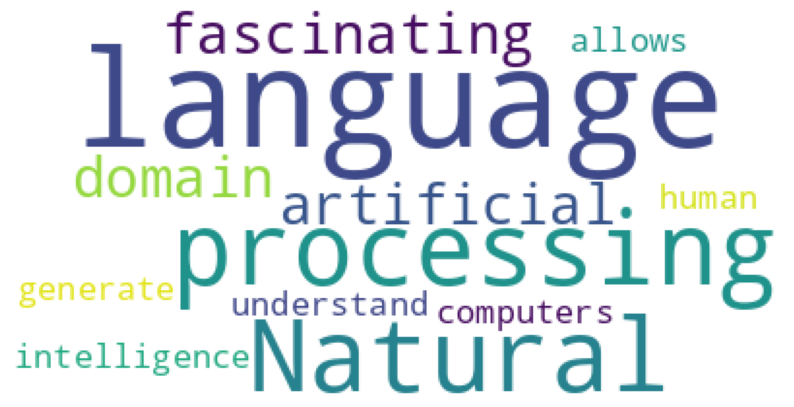

In [ ]:
##plot and display word cloud chart image
rcParams['figure.figsize'] = 10, 20
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
#filter out stopword from document
#and count word frequency
filtered_words = [word for word in doc.split() if word.lower() not in stopwords]
counted_words = collections.Counter(filtered_words)
words = []
counts = []

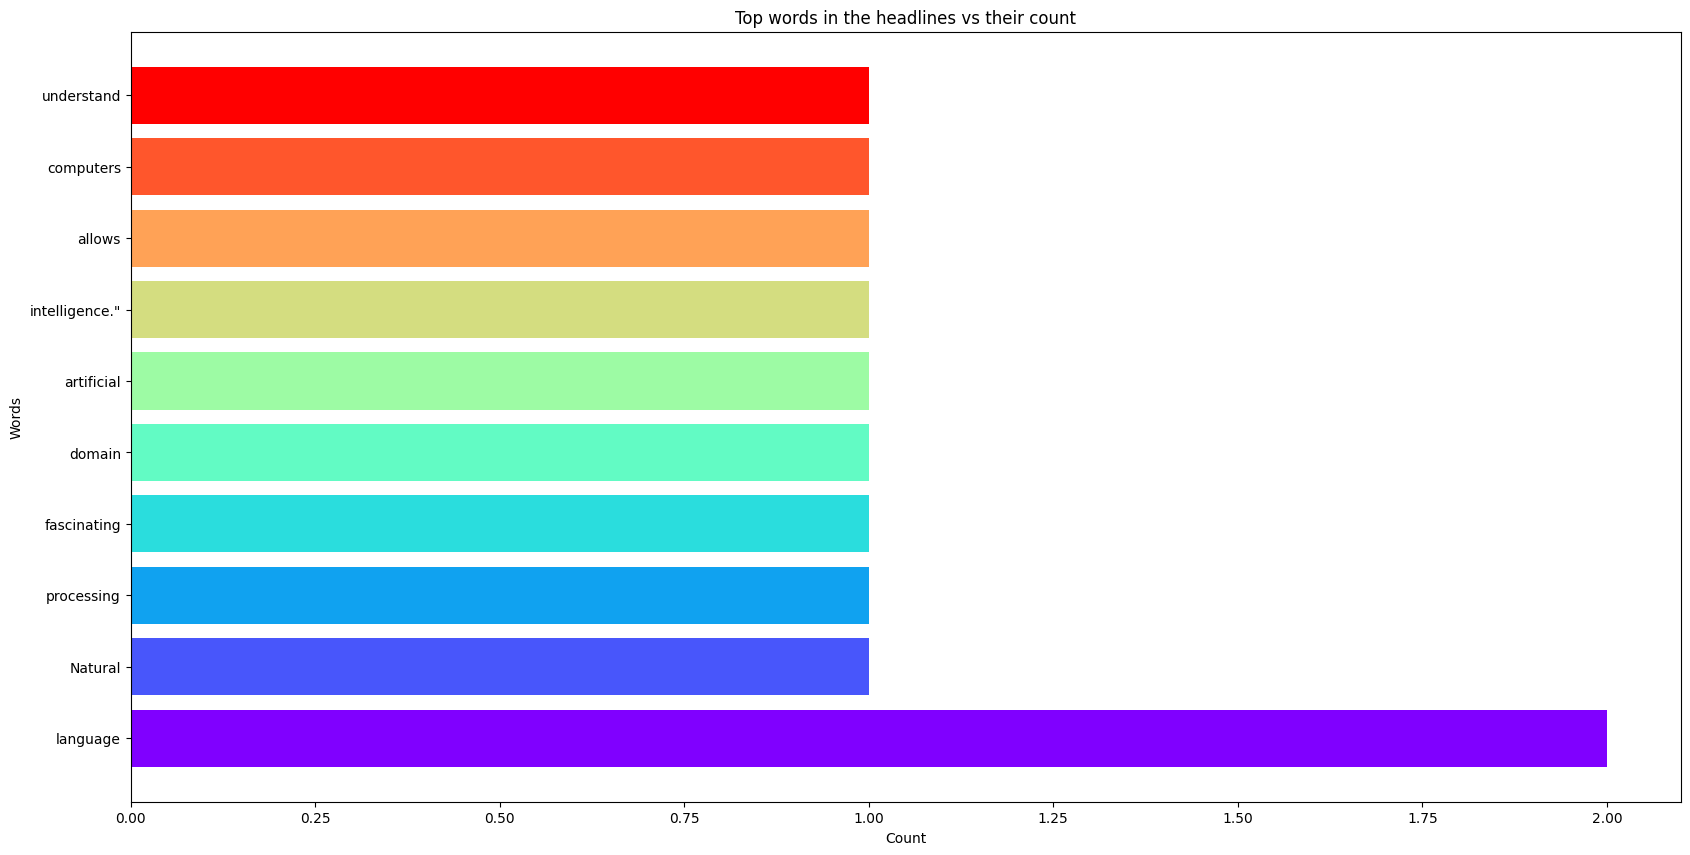

In [ ]:
#plot and display chart for 10 most common words in
#the document
for letter, count in counted_words.most_common(10):
  words.append(letter)
  counts.append(count)
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10
plt.title('Top words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)
plt.show()